In [1]:
from keras import applications, optimizers
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.convolutional import Convolution2D
from keras import backend as K
import keras
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from img_loader import DatasetLoader
from keras.utils import np_utils
from keras.preprocessing import image
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
from sklearn.preprocessing import MinMaxScaler
import scipy.misc
from PIL import ImageEnhance, ImageOps
import cv2
import matplotlib.pyplot as pp
from keras.models import load_model, save_model
import random
from numpy import argmax
import tensorflow as tf

Using TensorFlow backend.


In [54]:
correct_preds = np.load('results_correct_prediction.npy')
wrong_preds = np.load('results_wrong_prediction.npy')

In [55]:
correct_preds.shape

(10209, 5, 2)

In [56]:
wrong_preds.shape

(178, 8, 2)

In [86]:
correct_preds[:, 2:].shape

(10209, 3, 2)

In [87]:
correct_preds[:, 2:, 1:]

array([[['0.6086244639829911'],
        ['0.6741604550340611'],
        ['0.619378360750209']],

       [['0.7168559178006866'],
        ['0.800995615323544'],
        ['0.7206453993208228']],

       [['0.8174006478041715'],
        ['0.8686775049752646'],
        ['0.822848550228922']],

       ..., 
       [['0.2451462507633796'],
        ['0.35860695888539657'],
        ['0.26564191242945895']],

       [['0.3305650552972705'],
        ['0.3922146556993603'],
        ['0.3587589040677532']],

       [['0.5222994633844229'],
        ['0.6823573256038512'],
        ['0.5479758790925087']]],
      dtype='<U22')

In [92]:
correct_preds[:, 2:, 1:][:,1][:,0]

array(['0.6741604550340611', '0.800995615323544', '0.8686775049752646',
       ..., '0.35860695888539657', '0.3922146556993603',
       '0.6823573256038512'],
      dtype='<U22')

In [97]:
unchanged = correct_preds[:, 2:, 1:][:,0][:,0].astype(np.float)
n10 = correct_preds[:, 2:, 1:][:,1][:,0].astype(np.float)
nmin = correct_preds[:, 2:, 1:][:,2][:,0].astype(np.float)

In [99]:
print('unchanged')
print('min', unchanged.min())
print('max', unchanged.max())
print('mean', unchanged.mean())
print('median', np.median(unchanged))

print('n01')
print('min', n10.min())
print('max', n10.max())
print('mean', n10.mean())
print('median', np.median(n10))

print('nmin')
print('min', nmin.min())
print('max', nmin.max())
print('mean', nmin.mean())
print('median', np.median(nmin))

unchanged
min 0.0
max 0.941213615425
mean 0.344418201767
median 0.327549380612
n01
min 0.0
max 0.955136974254
mean 0.419476560734
median 0.416185587538
nmin
min -2.0380537665
max 1.51318781641
mean 0.344006533973
median 0.333015327407


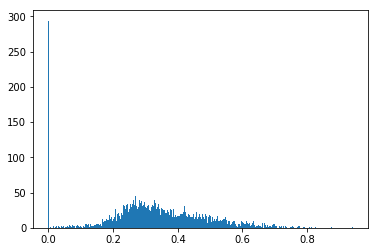

In [82]:
plt.hist(correct_preds[:, 2:, 1:][:,0][:,0].astype('float32'), bins=1000)
plt.show()

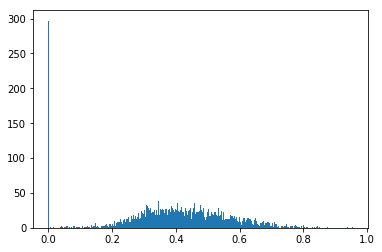

In [89]:
plt.hist(correct_preds[:, 2:, 1:][:,1][:,0].astype('float32'), bins=1000)
plt.show()

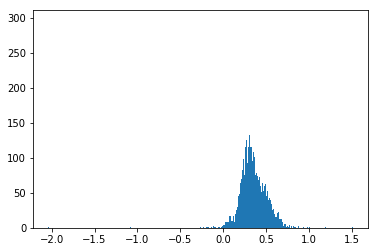

In [90]:
plt.hist(correct_preds[:, 2:, 1:][:,2][:,0].astype('float32'), bins=1000)
plt.show()

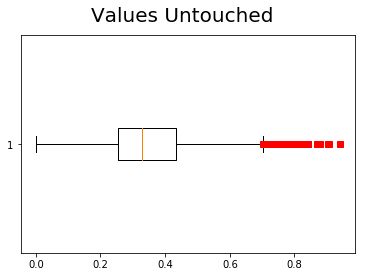

In [51]:
plt.figure().suptitle('Values Untouched', fontsize=20)
plt.boxplot(correct_preds[:, 2:, 1:][:,0][:,0].astype('float32'), 0, 'rs', 0)
plt.show()

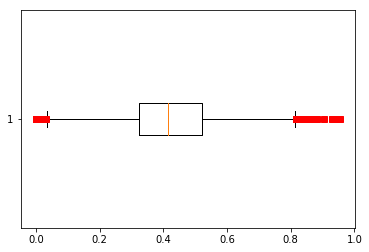

In [52]:
plt.figure().suptitle('normalized between 0, 1', fontsize=20)
plt.figure()
plt.boxplot(correct_preds[:, 2:, 1:][:,1][:,0].astype('float32'), 0, 'rs', 0)
plt.show()

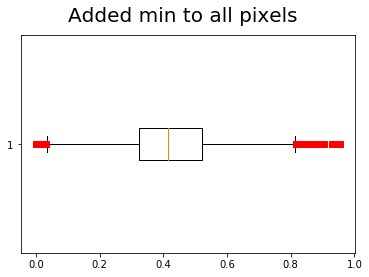

In [91]:
plt.figure().suptitle('Added min to all pixels', fontsize=20)
plt.boxplot(correct_preds[:, 2:, 1:][:,1][:,0].astype('float32'), 0, 'rs', 0)
plt.show()

In [ ]:
#HISTOGRAM OF corrects_preds
plt.hist(list_of_cams.flatten(), bins=1000)
plt.show()